Final Means:
[[-0.136 -0.072]
 [ 4.905  5.14 ]]

Cluster Counts:
[50 50]


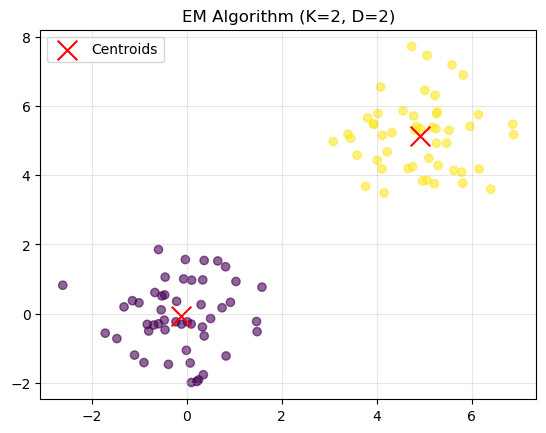

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# -----------------------------
# 1. Generate simple 2D data
# -----------------------------
np.random.seed(42)

X = np.vstack((
    np.random.multivariate_normal([0, 0], np.eye(2), 50),
    np.random.multivariate_normal([5, 5], np.eye(2), 50)
))

N = 100        # number of data points
K = 2          # number of clusters
D = 2          # dimensions

# -----------------------------
# 2. Initialize parameters
# -----------------------------
means = np.array([[1.0, 1.0],
                  [4.0, 4.0]])      

covs = np.array([np.eye(2), np.eye(2)])
weights = np.array([0.5, 0.5])

resps = np.zeros((N, K))

# -----------------------------
# 3. EM Algorithm
# -----------------------------
for _ in range(10):

    # ----- E-Step -----
    for k in range(K):
        resps[:, k] = weights[k] * multivariate_normal.pdf(
            X, mean=means[k], cov=covs[k]
        )

    resps = resps / resps.sum(axis=1, keepdims=True)

    # ----- M-Step -----
    for k in range(K):
        Nk = resps[:, k].sum()

        means[k] = (resps[:, k][:, None] * X).sum(axis=0) / Nk

        diff = X - means[k]
        covs[k] = (resps[:, k][:, None] * diff).T @ diff / Nk

        weights[k] = Nk / N

# -----------------------------
# 4. Final results
# -----------------------------
final_assignments = np.argmax(resps, axis=1)

print("Final Means:")
print(np.round(means, 3))

print("\nCluster Counts:")
print(np.bincount(final_assignments))

# -----------------------------
# 5. Visualization
# -----------------------------
plt.scatter(X[:, 0], X[:, 1], c=final_assignments, cmap='viridis', alpha=0.6)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title("EM Algorithm (K=2, D=2)")
plt.grid(alpha=0.3)
plt.show()
